In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Height-Weight Data - Height-Weight Data.csv")
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Table')

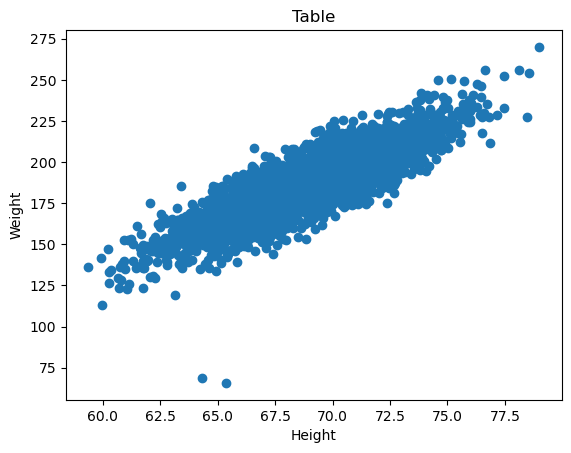

In [3]:
plt.scatter(df.Height,df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Table")

In [4]:
h = df.drop('Weight',axis = 1)
w = df[['Weight']]

In [5]:
h.head()
w.shape

(3501, 1)

In [6]:
w.head()
w.shape

(3501, 1)

In [7]:
h.mean()

Height    69.024411
dtype: float64

In [8]:
w.mean()

Weight    186.891258
dtype: float64

# Seperate manually

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train,test = train_test_split(df, test_size = 0.25) #testing data 25%

In [11]:
train.shape

(2625, 2)

In [12]:
train.head()

,Height,Weight
3076,65.489762,172.467088
1643,65.796050,158.460324
3100,69.477410,191.763852
2532,67.516370,173.520053
70,69.289510,184.595608


# Best way to separate data

In [44]:
htrain,htest,wtrain,wtest = train_test_split(h,w,test_size = .25,random_state = 3) #testing data 25%

In [43]:
htrain.head()

,Height
2259,72.607697
2904,68.155466
1259,68.506101
3335,72.362112
1420,66.340100


In [45]:
train.head()

,Height,Weight
3076,65.489762,172.467088
1643,65.796050,158.460324
3100,69.477410,191.763852
2532,67.516370,173.520053
70,69.289510,184.595608


# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [51]:
lr.fit(htrain,wtrain)

LinearRegression()

In [56]:
m = lr.coef_
m

array([[5.93404121]])

In [57]:
c = lr.intercept_
c

array([-222.96226242])

In [62]:
lr.predict([[65.796050]])

C:\Users\h\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[167.47420946]])

In [81]:
df["Predicted_Weight"] = lr.predict(h)
df.head()

,Height,Weight,Predicted_Weight
0,73.847017,241.893563,215.248980
1,68.781904,162.310473,185.192390
2,74.110105,212.740856,216.810157
3,71.730978,220.042470,202.692319
4,69.881796,206.349801,191.719194


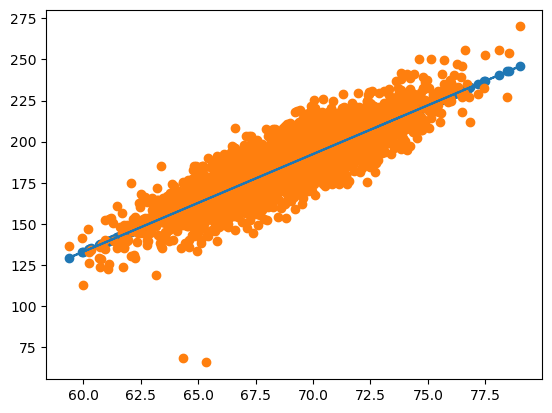

In [80]:
plt.plot(h,df[['Predicted_Weight']])
plt.scatter(h,df["Predicted_Weight"])
plt.scatter(h,df[["Weight"]])


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mae = mean_absolute_error(wtest,lr.predict(htest))
mae

7.9361738006169915

In [74]:
mse = mean_squared_error(wtest , lr.predict(htest))

In [75]:
mse

109.47329101010376

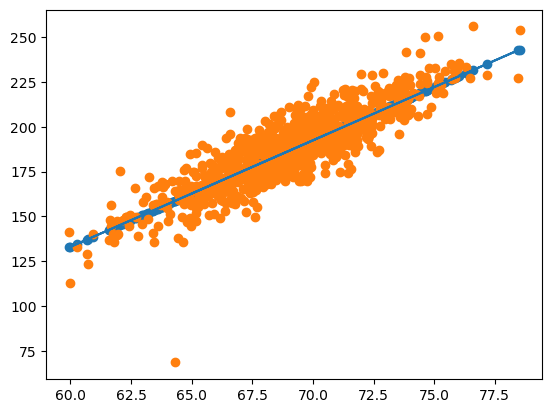

In [84]:
plt.plot(htest,lr.predict(htest))
plt.scatter(htest,lr.predict(htest))
plt.scatter(htest,wtest)